In [24]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [25]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
X= df.drop(["output"],axis=1)
Y=df['output']


X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
X_train, X_, y_train, y_ = train_test_split(X,Y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (181, 13) y_train.shape (181,)
X_cv.shape (61, 13) y_cv.shape (61,)
X_test.shape (61, 13) y_test.shape (61,)


In [29]:
clf= RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(X_train,y_train)
pred_cv=clf.predict(X_cv)



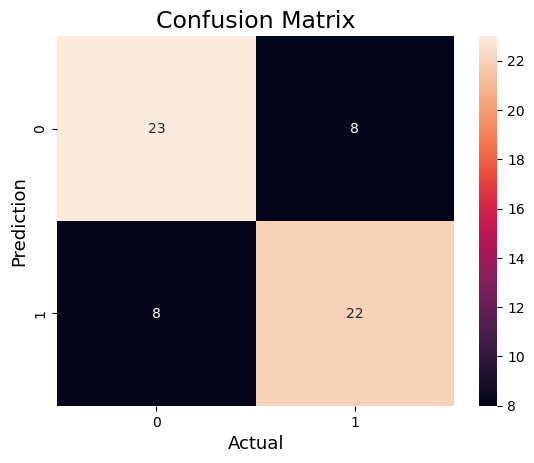

In [30]:
cm = confusion_matrix(y_cv,pred_cv)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_cv, pred_cv)
print("Accuracy   :", accuracy)
precision = precision_score(y_cv, pred_cv)
print("Precision :", precision)
recall = recall_score(y_cv, pred_cv)
print("Recall    :", recall)
F1_score = f1_score(y_cv, pred_cv)
print("F1-score  :", F1_score)

Accuracy   : 0.7377049180327869
Precision : 0.7333333333333333
Recall    : 0.7333333333333333
F1-score  : 0.7333333333333333


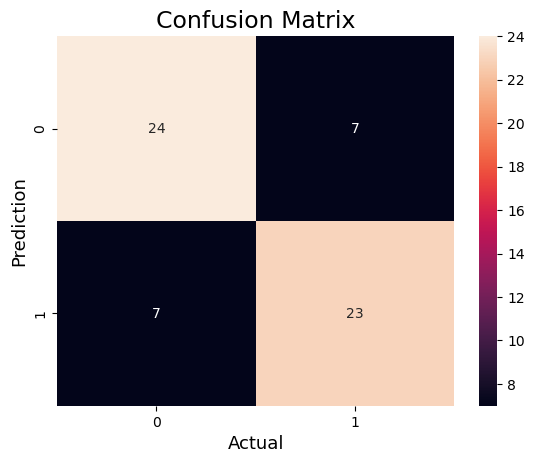

In [32]:
from xgboost import XGBClassifier
xgmodel=XGBClassifier()
xgmodel.fit(X_train,y_train)
xgpred= xgmodel.predict(X_cv)
cm = confusion_matrix(y_cv,xgpred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [33]:
accuracyxg = accuracy_score(y_cv, xgpred)
print("Accuracy   :", accuracyxg)

F1_scorexg = f1_score(y_cv, xgpred)
print("F1-score  :", F1_scorexg)

Accuracy   : 0.7704918032786885
F1-score  : 0.7666666666666667


In [34]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xcv = sc_x.transform(X_cv)

In [35]:

from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

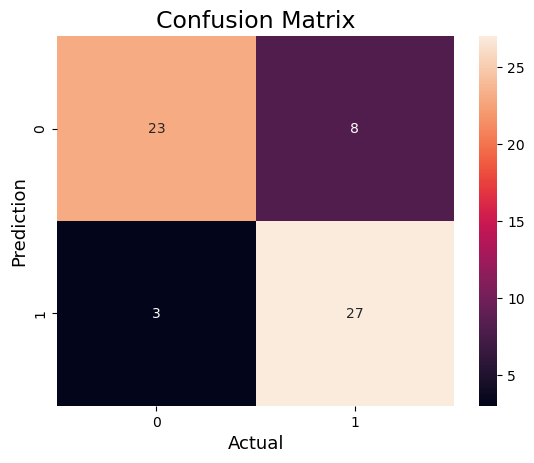

In [36]:
lgpred= classifier.predict(xcv)

cm = confusion_matrix(y_cv,lgpred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [37]:
accuracylg = accuracy_score(y_cv, lgpred)
print("Accuracy   :", accuracylg)

F1_scorelg = f1_score(y_cv, lgpred)
print("F1-score  :", F1_scorelg)

Accuracy   : 0.819672131147541
F1-score  : 0.8307692307692307
